# Profitable Apps for the App Store and Google Play Markets

Our company builds iOS and Android mobile apps made available on the App Store and Google Play. Our company specifically builds apps that are free to download and install. Therefore, our main source of revenue consists of in-app ads. The number of users of our apps determines our revenue for any given app — the more users who see and engage with the ads, the better.

The goal is to help our developers understand what types of apps will generate the most profit. To do this we'll look at data from 10k Android apps and and 7200 Apple apps
* Apple Store Data - documentation and download link: [Here](https://www.kaggle.com/datasets/ramamet4/app-store-apple-data-set-10k-apps)
* Google Play Store Data - documentation and download link: [Here](https://www.kaggle.com/datasets/lava18/google-play-store-apps) 

In [1]:
import pandas as pd

In [2]:
apple = pd.read_csv('AppleStore.csv')
android = pd.read_csv('googleplaystore.csv')

## Explore Data

In [3]:
apple.head(3)

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1


In [4]:
android.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## Clean Data

In [5]:
android.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

The above row (index: 10472) was missing a value for the Category column and we can see that the other values are shifted to the wrong columns so we will delete this row from our dataframe.

In [6]:
print(len(android))
android.drop([10472], inplace=True)
print(len(android))

10841
10840


### Duplicate Apps

When looking for duplicate apps in our datasets, Android returned quite a few while Apple only returned a couple. We'll determine which of the duplicates we should keep and remove the rest from our dataset so apps aren't being counted multiple times in our analysis. 

In [7]:
print('Duplicates (GooglePlay): ' + str(sum(android.duplicated('App'))))
print('Duplicates (Apple): ' + str(sum(apple.duplicated('track_name'))))

Duplicates (GooglePlay): 1181
Duplicates (Apple): 2


In both datasets, the duplicate apps differ by number of Reviews/Ratings (Column Names: *Reviews*(Android), *rating_count_tot*(Apple)). It makes sense to keep the record with the most reviews for each app because that's probably the most recent record.

In [8]:
android[(android.duplicated('App', keep=False)) & (android['App'] == 'Instagram') ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device


In [9]:
#drop duplicate android apps
android = android.sort_values(by='Reviews').drop_duplicates('App', keep='last')

In [10]:
apple[apple.duplicated('track_name', keep=False)]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


In [11]:
#drop duplicate apple apps
apple = apple.sort_values(by='rating_count_tot').drop_duplicates('track_name', keep='last')

### Drop Non-Enligh Apps

There are apps in our datasets that are written in a different language. Our company specifically develops apps in English so we want to remove all of the non-English apps from the datasets. To determine if an app is non-English, we will check if the characters are in the ASCII range. Any app that has a name with at least 3 characters outside of the ASCII range, will be removed.

In [21]:
# function to determine if App name reaches the ASCII range threshold we set
def english_char(string):
    count = 0
    for char in string:
        if count > 3:
            return False
        if ord(char) > 127:
            count += 1
    return True

english_char('爱奇艺欢乐颂')

False

In [20]:
apple = apple[apple['track_name'].apply(english_char)]
android = android[android['App'].apply(english_char)]

### Isolate Free Apps

As mentioned above, our company only builds free apps so we'll drop all non-free apps. The price column in the android dataset is string type and the price column in the apple dataset is a float type so we'll account for both when checking.

In [45]:
# function to find free apps
def free_app(price):
    if price in ['0', '0.0', '0.00', '$0', '$0.0', '$0.00', 0.00]:
        return True
    else:
        return False

In [48]:
android_free = android[android['Price'].apply(free_app)]
apple_free = apple[apple['price'].apply(free_app)]

In [53]:
# Free app counts
print('Google Play: ' + str(len(android_free)))
print('Apple: ' + str(len(apple_free)))

Google Play: 8864
Apple: 3251


## Determining the Most Popular Apps

Now that we cleaned our dataset, we will analyze the data to try to determine the most popular apps.

Our validation strategy for building out a new app:
  1. Build a minimal Android version of the app, and add it to Google Play.
  2. If the app has a good response from users, we develop it further.
  3. If the app is profitable after six months, we build an iOS version of the app and add it to the App Store.
 
The end goal is to have our app on both the Google Play and Apple platforms so we are looking for apps that are popular across both datasets.

Below we look at the most common Genres/Categories of free apps to try to get a feel for what's out there.

The results from the android dataset lean more towards practical apps overall. Although, 2 of the most common categories/genres are fun apps: Entertainment and Games. Besides those, the rest are for more practical use.

In [82]:
android_free['Genres'].value_counts(normalize=True).head(10)

Tools              0.084386
Entertainment      0.060695
Education          0.053475
Business           0.045916
Lifestyle          0.039034
Productivity       0.038921
Finance            0.037004
Medical            0.035199
Sports             0.034634
Personalization    0.033168
Name: Genres, dtype: float64

In [83]:
android_free['Category'].value_counts(normalize=True).head(10)

FAMILY             0.189531
GAME               0.096909
TOOLS              0.084499
BUSINESS           0.045916
LIFESTYLE          0.039147
PRODUCTIVITY       0.038921
FINANCE            0.037004
MEDICAL            0.035199
SPORTS             0.033958
PERSONALIZATION    0.033168
Name: Category, dtype: float64

For the results of the iOS apps data set we see the Games genre with a massive percentage 58% of the market share. Something else that stands out about the data set is that 4 of the top 5 genres with the highest percentage of apps are geared towards entertainment/fun (that makes up 75% of total apps) and only 1 app in the top 5 is of more practical use. It's safe to say that the App Store data base has an emphasis on apps for fun.

In [84]:
apple_free['prime_genre'].value_counts(normalize=True).head(10)

Games                0.578284
Entertainment        0.079360
Photo & Video        0.049216
Education            0.036297
Social Networking    0.032605
Shopping             0.026761
Utilities            0.025223
Sports               0.021224
Music                0.020301
Health & Fitness     0.019994
Name: prime_genre, dtype: float64

There could be many reasons behind the number of apps in each category/genre so we won't infer that app count equates to popularity. 

Below we look at the average reviews/ratings count for the different categories/genres (top 15). When looking at the categories with the top number of ratings we have to take into consideration that, for some of these genres, 1 or 2 apps make up the majority of ratings. For instance - Google/Apple Maps has majority ratings for Maps/Navigation, Facebook and Instagram in Social, and Spotify and Apple Music in Music.

Some of the top reviewed categories from the Google Play dataset below that seem interesting for our company are Game, Productivity, Tools, Social/Communication, Personalization

In [121]:
android_free.groupby('Category').mean()['Reviews'].sort_values(ascending=False).head(15)

Category
COMMUNICATION          995608.463415
SOCIAL                 965830.987288
GAME                   683839.718277
VIDEO_PLAYERS          425350.081761
PHOTOGRAPHY            403207.402299
TOOLS                  306086.652870
ENTERTAINMENT          303790.380952
SHOPPING               223887.346734
PERSONALIZATION        181122.316327
WEATHER                171250.774648
PRODUCTIVITY           160634.542029
MAPS_AND_NAVIGATION    142860.048387
TRAVEL_AND_LOCAL       129484.425121
SPORTS                 116938.614618
FAMILY                 112982.882143
Name: Reviews, dtype: float64

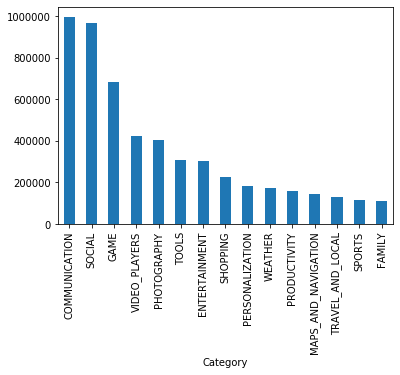

In [156]:
android_free.groupby('Category').mean()['Reviews'].sort_values(ascending=False).head(15).plot.bar()

Below is the average number of ratings for app genres on the App Store (top 15). Some genres we may consider when looking at these results and taking into account the resources it would take to build the apps - Book, Games, Health & Fitness, Finance

In [122]:
apple_free.groupby('prime_genre').mean()['rating_count_tot'].sort_values(ascending=False).head(15)

prime_genre
Navigation           86090.333333
Reference            74942.111111
Social Networking    71548.349057
Music                57326.530303
Weather              50477.137931
Book                 37217.733333
Food & Drink         29885.758621
Photo & Video        28441.543750
Finance              27638.243902
Travel               26925.166667
Shopping             25996.321839
Health & Fitness     23298.015385
Sports               23008.898551
Games                22715.850532
News                 21248.023256
Name: rating_count_tot, dtype: float64

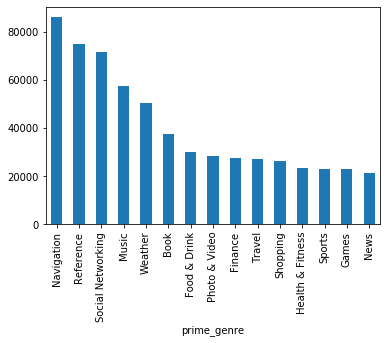

In [157]:
apple_free.groupby('prime_genre').mean()['rating_count_tot'].sort_values(ascending=False).head(15).plot.bar()

Our Google Play dataset has number of installs included (App Store dataset does not). The values in this column have a '+' symbol to identify a range. For example: *10,000+*, *5,000,000+*, *100+*. So we can find the mean number of installs for each category, we converted this value to a float in a new column Installs_num. 

In [ ]:
android_free['Installs_num'] = android_free['Installs'].str.replace('+','').str.replace(',','').astype(float)

Below shows the average installs for the top 15 categories. Similar to the rating counts, we have to keep in mind the outliers in certain categories. As there may be 1 or 2 apps that have extreme numbers of downloads in certain categories. Categories to consider: Social, Productivity, Game, Tools, Books and Reference, Health and Fitness, Personalization. 

In [147]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
android_free.groupby('Category').mean()['Installs_num'].sort_values(ascending=False).head(15)

Category
COMMUNICATION         38456119.17
VIDEO_PLAYERS         24727872.45
SOCIAL                23253652.13
PHOTOGRAPHY           17805627.64
PRODUCTIVITY          16787331.34
GAME                  15560965.60
TRAVEL_AND_LOCAL      13984077.71
ENTERTAINMENT         11719761.90
TOOLS                 10682301.03
NEWS_AND_MAGAZINES     9549178.47
BOOKS_AND_REFERENCE    8721959.48
SHOPPING               7036877.31
PERSONALIZATION        5201482.61
WEATHER                5074486.20
HEALTH_AND_FITNESS     4188821.99
Name: Installs_num, dtype: float64

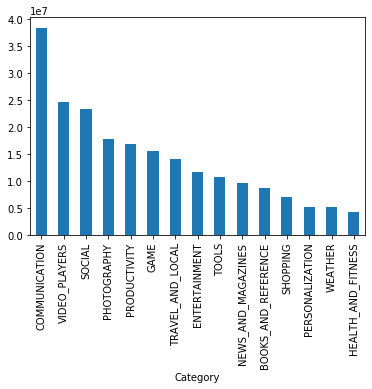

In [169]:
android_free.groupby('Category').mean()['Installs_num'].sort_values(ascending=False).head(15).plot.bar()

## Conclusion

Overall, there are many options for our company to think about when creating apps. We want to be conscious of our companies resources and the best way to put those to use. There are some apps that may be very popular but they take an immense amount of resources to build. For example, a social network app like Facebook or Instagram. Yes, these are some of the most popular apps in the world but to build a competitor to either one of these is not plausible unless we want to devote all our companies resources for the next however many years to a single app. 

With that in mind, three recommendations for apps we have for our development team are: Social Games, Self-Improvement, Personalization.

* Social Games: Games were very popular in both datasets. Ranking in the top in review/rating count and number of installs. Rather than just building games, if we focus of creating games that can be played between two or more people, then we are adding that social component which is another type of app that was ranked highly. An example of a social game would be Words With Friends.
* Self-Improvement: There were several categories that I put under the self-improvement umbrella that seemed to do well. Productivity, Books, Finance, Health & Fitness. People use apps to improve different areas of their life. I think an app that helps people track new habits, a personal finance app, or a great note taking app would be solid options for our company to consider
* Personalization: This category was further down in the top 15 rankings for ratings and installs. However, I see this as a category that won't be as resource intensive to build but can still do well. Apps that fall into this category are geared towards altering the aesthetic on phones. For example: Wallpaper & Backgrounds, Theme Builders, Fonts, Pic collage.